In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [4]:
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

In [7]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [12]:
image, label = train_data[0]
print(image.shape)
print(label)

torch.Size([1, 28, 28])
5


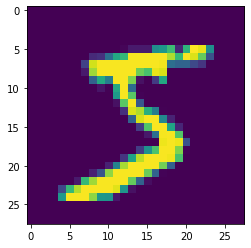

In [13]:
#show image in pyplot
plt.imshow(image.reshape(28,28))

In [14]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [15]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [16]:
for images, labels in train_loader:
    break

Labels:  [   4    6    2    3    4    0    9    5    0    1    6    9]


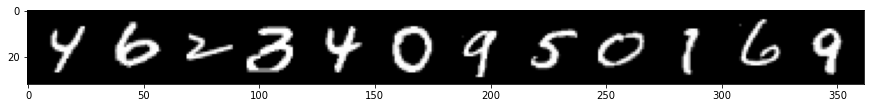

In [17]:
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(15,9))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [18]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)
        
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X, dim=1)

In [23]:
torch.manual_seed(101)

model = MultiLayerPerceptron()
model

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [25]:
images.shape

torch.Size([100, 1, 28, 28])

In [26]:
images.view(100,-1).shape

torch.Size([100, 784])

In [29]:
import time

start_time = time.time()


EPOCHS = 10

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for epoch in range(EPOCHS):
    trn_corr = 0
    tst_corr = 0
    
    for batch, (X_train, y_train) in enumerate(train_loader):
        batch+=1
        y_pred = model(X_train.view(100,-1))
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_correct = (predicted == y_train).sum()
        trn_corr += batch_correct
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            acc = trn_corr*100/(100*batch)
            print(f"Epoch: {epoch+1} Batch: {batch} Loss: {loss.item()}")
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        for batch, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500,-1))
            predicted = torch.max(y_val.data,1)[1]
            tst_corr+=(predicted == y_test).sum()
            
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

end_time = time.time() - start_time
print(f"Duration: {end_time/60}mins")

Epoch: 1 Batch: 100 Loss: 0.0009813050273805857
Epoch: 1 Batch: 200 Loss: 0.0011495534563437104
Epoch: 1 Batch: 300 Loss: 0.005087132565677166
Epoch: 1 Batch: 400 Loss: 0.017909947782754898
Epoch: 1 Batch: 500 Loss: 0.0018325534183532
Epoch: 1 Batch: 600 Loss: 0.0339050330221653
Epoch: 2 Batch: 100 Loss: 0.039488285779953
Epoch: 2 Batch: 200 Loss: 0.003150275442749262
Epoch: 2 Batch: 300 Loss: 0.0007409947575069964
Epoch: 2 Batch: 400 Loss: 0.001086209318600595
Epoch: 2 Batch: 500 Loss: 0.006369079928845167
Epoch: 2 Batch: 600 Loss: 0.0005036263028159738
Epoch: 3 Batch: 100 Loss: 0.001260704593732953
Epoch: 3 Batch: 200 Loss: 0.000976679497398436
Epoch: 3 Batch: 300 Loss: 0.0009498195140622556
Epoch: 3 Batch: 400 Loss: 0.039785414934158325
Epoch: 3 Batch: 500 Loss: 0.0014504714636132121
Epoch: 3 Batch: 600 Loss: 0.0004191102343611419
Epoch: 4 Batch: 100 Loss: 0.0013184604467824101
Epoch: 4 Batch: 200 Loss: 0.0046797264367341995
Epoch: 4 Batch: 300 Loss: 0.0018516011768952012
Epoch: 4 B